### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn


# Note: Indicates situations that aren’t necessarily exceptions.
import warnings 
warnings.filterwarnings('ignore')  

In [2]:
# Load the CSV file(s) as reviews.
reviews_raw = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
reviews_raw.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
reviews_raw.duplicated().sum()

0

In [4]:
# Any missing values?
reviews_raw.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# There are no missing values in the dataset.

In [6]:
# Explore the data.
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


There are 11 columns and 2000 rows, 5 quantitative variables (int64 and floats). Dependable variable,
loyalty point is 
quantitative type - int64. No null values - i.e. no missing values.


In [7]:
# Descriptive statistics.
reviews_raw.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [8]:
# The statistics of the numerical values show there to be all the entries and mean , max and min all meake sense. 

## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews = reviews_raw[['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'product', 'education', 'review', 'summary']]

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'product', 'education', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [10]:
# Rename the column headers.
reviews =  reviews.rename(columns = {'remuneration (k£)': 'income', 'spending_score (1-100)': 'score', \
                                     'loyalty_points': 'lpts'})

# View column names.
reviews.columns

Index(['gender', 'age', 'income', 'score', 'lpts', 'product', 'education',
       'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews.to_csv("turtle_reviews_clean.csv", index=False)

In [12]:
# Import new CSV file with Pandas.
rc = pd.read_csv("turtle_reviews_clean.csv")

# View DataFrame.
rc.head()

gender  age  income  score  lpts  product education  \
0    Male   18   12.30     39   210      453  graduate   
1    Male   23   12.30     81   524      466  graduate   
2  Female   22   13.12      6    40      254  graduate   
3  Female   25   13.12     77   562      263  graduate   
4  Female   33   13.94     40   366      291  graduate   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [13]:
# Explore the data
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     2000 non-null   object 
 1   age        2000 non-null   int64  
 2   income     2000 non-null   float64
 3   score      2000 non-null   int64  
 4   lpts       2000 non-null   int64  
 5   product    2000 non-null   int64  
 6   education  2000 non-null   object 
 7   review     2000 non-null   object 
 8   summary    2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [14]:
# create the log(2) of teh loyalty points
rc['Llpts'] = np.log2(rc['lpts'])

# rearrange the columns
rc = rc[list(('Llpts', 'lpts', 'gender', 'age', 'income', 'score', 'product', 'education', \
              'review',  'summary'))]

# Create a CSV file as output.
rc.to_csv("turtle_reviews_clean_log.csv", index=False)

# Show the dataframe
rc

Llpts  lpts  gender  age  income  score  product education  \
0      7.714246   210    Male   18   12.30     39      453  graduate   
1      9.033423   524    Male   23   12.30     81      466  graduate   
2      5.321928    40  Female   22   13.12      6      254  graduate   
3      9.134426   562  Female   25   13.12     77      263  graduate   
4      8.515700   366  Female   33   13.94     40      291  graduate   
...         ...   ...     ...  ...     ...    ...      ...       ...   
1995  11.976922  4031  Female   37   84.46     69      977       PhD   
1996   9.074141   539  Female   43   92.66      8      979       PhD   
1997  12.454813  5614    Male   34   92.66     91     1012  graduate   
1998  10.033423  1048    Male   34   98.40     16     1031       PhD   
1999   8.903882   479    Male   32   92.66      8      453       PhD   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [15]:
rc['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

There are no missing data, and still 2000 rows but 9 columns as 2 columns were dropped.

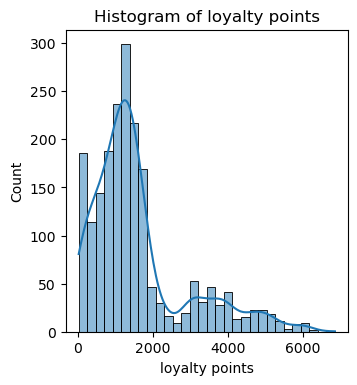

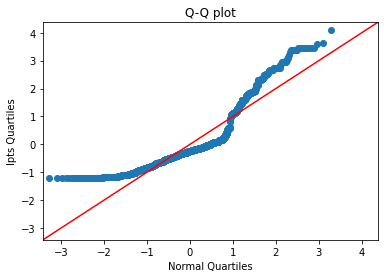

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: lpts, Length: 2000, dtype: int64


In [16]:
# Draw histogram of variable LVOL
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(rc, x="lpts", bins=30, kde=True)
plt.title("Histogram of loyalty points")
plt.xlabel("loyalty points")

# Plot the loyalty pointsL versus the quartiles of the N(0,1)
# The fit=True argument first Standardises lpts before plotting them

#plt.subplot(1,2,2)
sm.qqplot(rc['lpts'], fit=True, line='45')
plt.ylabel("lpts Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")

# Save the chart as png
plt.savefig("Histogram of loyalty points.png")
plt.show()

print((rc['lpts']))

In [17]:
# Determine correlation
rc.corr()

Llpts      lpts       age    income     score   product
Llpts    1.000000  0.816247 -0.034590  0.533359  0.720184  0.174665
lpts     0.816247  1.000000 -0.042445  0.616065  0.672310  0.183600
age     -0.034590 -0.042445  1.000000 -0.005708 -0.224334  0.003081
income   0.533359  0.616065 -0.005708  1.000000  0.005612  0.305309
score    0.720184  0.672310 -0.224334  0.005612  1.000000 -0.001649
product  0.174665  0.183600  0.003081  0.305309 -0.001649  1.000000

In [18]:
# The Q-Q plot shows a poor fit. Therefore transform the data.

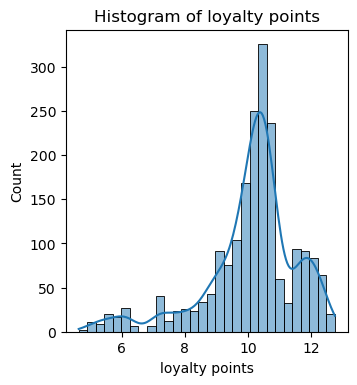

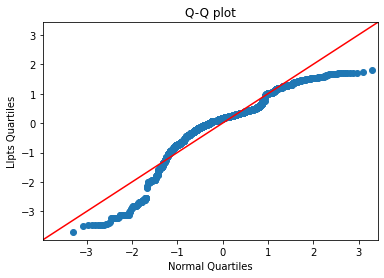

0        7.714246
1        9.033423
2        5.321928
3        9.134426
4        8.515700
          ...    
1995    11.976922
1996     9.074141
1997    12.454813
1998    10.033423
1999     8.903882
Name: Llpts, Length: 2000, dtype: float64


In [19]:
# Transform loyalty points 
# Draw histogram of variable log of loyalty points Llpts
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(rc, x="Llpts", bins=30, kde=True)
plt.title("Histogram of loyalty points")
plt.xlabel("loyalty points")

# Plot the loyalty pointsL versus the quartiles of the N(0,1)
# The fit=True argument first Standardises lpts before plotting them

#plt.subplot(1,2,2)
sm.qqplot(rc['Llpts'], fit=True, line='45')
plt.ylabel("Llpts Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")

# Save the chart as png
plt.savefig("Histogram of log of loyalty point.png")
plt.show()

print((rc['Llpts']))

In [20]:
# A very slight improvment on the fit witht he transformation

In [21]:
# Determine correlation
rc.corr()

Llpts      lpts       age    income     score   product
Llpts    1.000000  0.816247 -0.034590  0.533359  0.720184  0.174665
lpts     0.816247  1.000000 -0.042445  0.616065  0.672310  0.183600
age     -0.034590 -0.042445  1.000000 -0.005708 -0.224334  0.003081
income   0.533359  0.616065 -0.005708  1.000000  0.005612  0.305309
score    0.720184  0.672310 -0.224334  0.005612  1.000000 -0.001649
product  0.174665  0.183600  0.003081  0.305309 -0.001649  1.000000

## 5. Linear regression

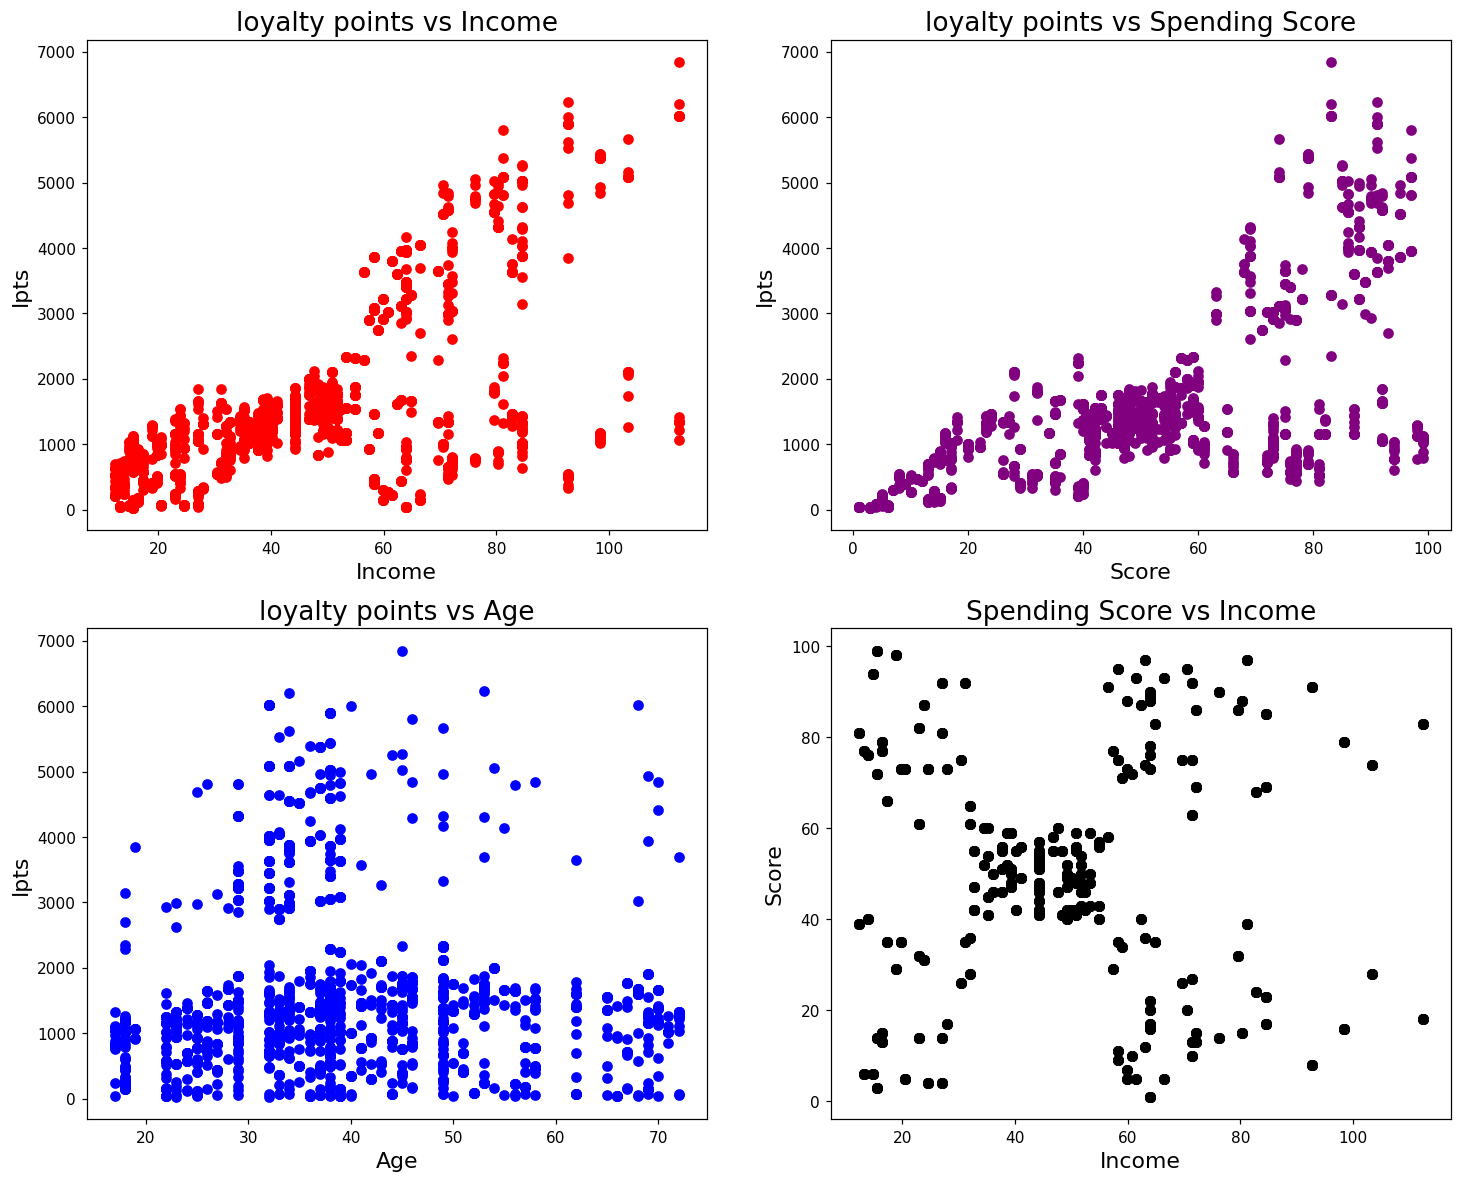

In [22]:
# Visualise the dataset
plt.figure(figsize=(16, 13), dpi=110)
plt.subplot(2,2,1)
plt.xlabel("Income", size = 'x-large')
plt.ylabel("lpts", size = 'x-large')
plt.title("loyalty points vs Income", size = 'xx-large')
plt.scatter(data=rc, y="lpts", x="income", color='red')
plt.subplot(2,2,2)
plt.xlabel("Score", size = 'x-large')
plt.ylabel("lpts", size = 'x-large')
plt.title("loyalty points vs Spending Score", size = 'xx-large')
plt.scatter(data=rc, y="lpts", x="score", color='purple')
plt.subplot(2,2,3)
plt.xlabel("Age", size = 'x-large')
plt.ylabel("lpts", size = 'x-large')
plt.title("loyalty points vs Age", size = 'xx-large')
plt.scatter(data=rc, y="lpts", x="age", color='blue')
plt.subplot(2,2,4)
plt.xlabel("Income", size = 'x-large')
plt.ylabel("Score", size = 'x-large')
plt.title("Spending Score vs Income", size = 'xx-large')
plt.scatter(data=rc, y="score", x="income", color='black')

# Save the chart as png
plt.savefig("Chart1-Correlation betwen a number of variables.png")

plt.show()

### 5a) spending score vs loyalty

In [23]:
# Define the dependent variable.
y = rc['lpts']  

# Define the independent variable.
x = rc['score']



In [24]:
#### Fit the model

In [25]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        18:04:34   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is 0.452, indicating that around 45.2% , less than half of the observed variation can be explained by
the model's inputs.
The adjusted R-squared is same as above, indicating that almost 45.2% of the total variability of loyalty points, is 
    explained by the variability of spending score.
    
The F-statistic was 1648. We need this value to determine the p-value
The p-value is 2.92e-263, and thus less than 0.05. Therefore, the p-value is significant.

In [26]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [27]:
# Create the linear regression model.
# Set the the coefficient to 33.06 and the constant to -75.05.
y_pred = (-75.05) + 33.06 * rc['score']

# View the output.
y_pred

0       1214.29
1       2602.81
2        123.31
3       2470.57
4       1247.35
         ...   
1995    2206.09
1996     189.43
1997    2933.41
1998     453.91
1999     189.43
Name: score, Length: 2000, dtype: float64

### Plot the graph with a regression line.

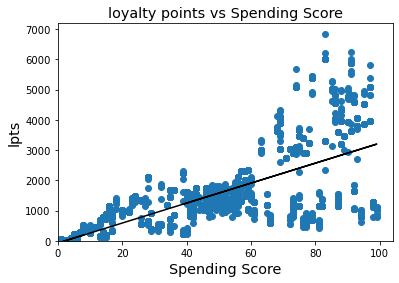

In [28]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)
plt.xlabel("Spending Score", size = 'x-large')
plt.ylabel("lpts", size = 'x-large')
plt.title("loyalty points vs Spending Score", size = 'x-large')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the chart as png
plt.savefig("Chart2-Loyalty points vs Spending Score.png")

# View the plot.
plt.show()

In [29]:
#### Check for homoscedasticity

In [30]:
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 629.982336021591, 'LM Test p-value': 5.042699614942813e-139, 'F-stat': 918.7507142907726, 'F-test p-value': 2.3037887924501407e-166}


According to our null hypothesis is rejected as the LM p values  Since this value is 5.042699614942813e-139 than 0.05, we
reject the null hypothesis Ho and assume heteroscedasticity is present.

In [31]:
# In odrer to addres heteroscedasticity the regressuion will be conducted with the log of  loyalty points.

In [32]:
# Define the dependent variable.
y = rc['Llpts']  

# Define the independent variable.
x = rc['score']

In [33]:
#### Fit the model

In [34]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2153.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          1.44e-319
Time:                        18:04:34   Log-Likelihood:                -2879.7
No. Observations:                2000   AIC:                             5763.
Df Residuals:                    1998   BIC:                             5775.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0416      0.049    162.833      0.000       7.945       8.138
x              0.0406      0.001     46.400      0.000       0.039       0.042
==============================================================================
Omnibus:                      247.764   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.804
Skew:                          -1.000   Prob(JB):                     1.34e-75
Kurtosis:                       3.366   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# The r square coefficient has has improved with the log value from 45 % to nearly 52%

In [36]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    8.041555
x            0.040631
dtype: float64
Standard errors:  Intercept    0.049385
x            0.000876
dtype: float64
Predicted values:  [ 9.62617474 11.3326879   8.28534297 ... 11.73900056  8.69165563
  8.3666055 ]


In [37]:
# Create the linear regression model.
# Set the the coefficient to 33.06 and the constant to -75.05.
y_pred = (8.04) + 0.041 * rc['score']

# View the output.
y_pred

0        9.639
1       11.361
2        8.286
3       11.197
4        9.680
         ...  
1995    10.869
1996     8.368
1997    11.771
1998     8.696
1999     8.368
Name: score, Length: 2000, dtype: float64

In [38]:
#### Plot the graph with regression line

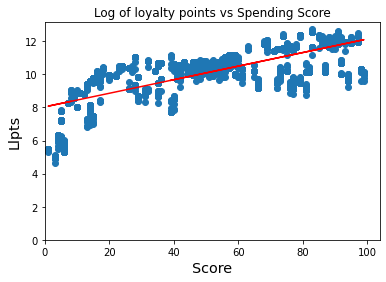

In [39]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)
plt.xlabel("Score", size ='x-large')
plt.ylabel("Llpts", size ='x-large')
plt.title("Log of loyalty points vs Spending Score", size = 'large')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the chart as png
plt.savefig("Chart3-Log of Loyalty points vs Spending Score.png")

# View the plot.
plt.show()

In [40]:
#### Check for homoscedasticity

In [41]:
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 92.451169419852, 'LM Test p-value': 6.900660585142246e-22, 'F-stat': 96.83497142491788, 'F-test p-value': 2.404357715982381e-22}


The LM p value is still very small and is less than 0.05, thus we have to reject the null hypothesis indicating that
there is still a presence of heteroscedasticity.

When observing a plot of the residuals, a fan or cone shape indicates the presence of heteroskedasticity. 
In statistics, heteroskedasticity is seen as a problem because regressions involving ordinary least squares (OLS) 
assume that the residuals are drawn from a population with constant variance.

If there is an unequal scatter of residuals, the population used in the regression contains unequal variance, and 
therefore the analysis results may be invalid.

### 5b) Income vs loyalty

In [42]:
# Define the dependent variable.
y = rc['lpts']  

# Define the independent variable.
x = rc['income']

In [43]:
# OLS model and summary.

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        18:04:35   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is 0.380, indicating that around 38% , just over one third of the observed variation can be explained by
the model's inputs.
The adjusted R-squared is 37.9, indicating that almost 37.9% of the total variability of loyalty points, is 
    explained by the variability of income.
    
The F-statistic was 1222. We need this value to determine the p-value
The p-value is 2.43e-2209, and thus less than 0.05. Therefore, the p-value is significant.

In [44]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [45]:
# Create the linear regression model.
# Set the the coefficient to 33.06 and the constant to -75.05.
y_pred = (-65.69) + 34.19 * rc['income']

# View the output.
y_pred

0        354.8470
1        354.8470
2        382.8828
3        382.8828
4        410.9186
          ...    
1995    2821.9974
1996    3102.3554
1997    3102.3554
1998    3298.6060
1999    3102.3554
Name: income, Length: 2000, dtype: float64

### Plot graph with regression line.

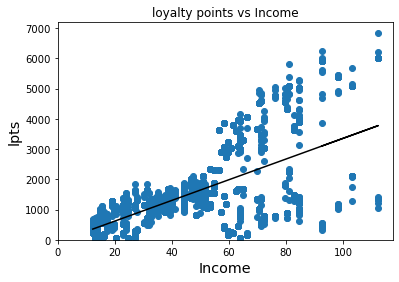

In [46]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)
plt.xlabel("Income", size='x-large')
plt.ylabel("lpts", size = 'x-large')
plt.title("loyalty points vs Income", size='large')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the chart as png
plt.savefig("Chart4 - Loyalty points vs Income.png")

# View the plot.
plt.show()

In [47]:
#### Check for homoscedasticity

In [48]:
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1038.6445487288283, 'LM Test p-value': 7.153051772822205e-228, 'F-stat': 2158.6311344219334, 'F-test p-value': 3.68e-320}


The LM p value is still very small and is less than 0.05, thus we have to reject the null hypothesis indicating that
there is a presence of heteroscedasticity.

In [49]:
# In odrer to addres heteroscedasticity the regressuion will be conducted with the log of  loyalty points.

In [50]:
# Define the dependent variable.
y = rc['Llpts']  

# Define the independent variable.
x = rc['income']

In [51]:
#### Fit the model

In [52]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     794.3
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          1.98e-147
Time:                        18:04:35   Log-Likelihood:                -3276.2
No. Observations:                2000   AIC:                             6556.
Df Residuals:                    1998   BIC:                             6568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4405      0.064    131.318      0.000       8.314       8.567
x              0.0340      0.001     28.184      0.000       0.032       0.036
==============================================================================
Omnibus:                      610.463   Durbin-Watson:                   2.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1512.287
Skew:                          -1.669   Prob(JB):                         0.00
Kurtosis:                       5.647   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 The r square coefficient has decreasewd from 38% to 28% indicating only 28% of the variance in loyalty points can be explained by the variance in income.

In [53]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    8.440511
x            0.033957
dtype: float64
Standard errors:  Intercept    0.064275
x            0.001205
dtype: float64
Predicted values:  [ 8.8581788   8.8581788   8.88602332 ... 11.58694159 11.78185322
 11.58694159]


In [54]:
# Create the linear regression model.
# Set the the coefficient to 33.06 and the constant to -75.05.
y_pred = (8.44) + 0.034 * rc['income']

# View the output.
y_pred

0        8.85820
1        8.85820
2        8.88608
3        8.88608
4        8.91396
          ...   
1995    11.31164
1996    11.59044
1997    11.59044
1998    11.78560
1999    11.59044
Name: income, Length: 2000, dtype: float64

In [55]:
#### Plot the graph with regression line

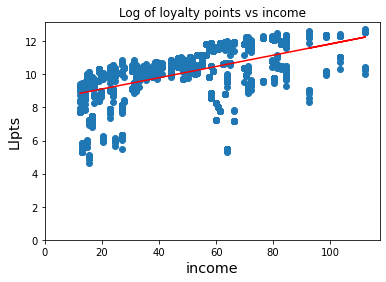

In [56]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)
plt.xlabel("income", size = 'x-large')
plt.ylabel("Llpts", size = 'x-large')
plt.title("Log of loyalty points vs income", size = 'large')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the chart as png
plt.savefig("Chart5-Log of Loyalty points vs income.png")

# View the plot.
plt.show()

In [57]:
#### Check for homoscedasticity

In [58]:
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 0.04764626018349816, 'LM Test p-value': 0.8272107748014195, 'F-stat': 0.04759974789827839, 'F-test p-value': 0.8273160836310481}


The LM p value is greater than 0.05, thus we fail to reject the null hypothesis indicating that there is a presence of homoscedasticity.

This model can be accepted to explain 28% of varance in the loyalty points being attributed by the variance in customer's income.

### 5c) age vs loyalty

In [59]:
# Define the dependent variable.
y = rc['lpts']  

# Define the independent variable.
x = rc['age']

In [60]:
# OLS model and summary.
# OLS model and summary.

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = rc).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 21 Apr 2023   Prob (F-statistic):             0.0577
Time:                        18:04:35   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is 0.002, indicating that around 2% , only 2% of the observed variation can be explained by
the model's inputs.
The adjusted R-squared is 1%, indicating that almost none of the variability of loyalty points, is 
    explained by the variability in age.
    
The F-statistic was 3.606. We need this value to determine the p-value
The p-value is 0.058, and thus greaters than 0.05. Therefore, the p-value is not significant. 

In [61]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [62]:
# Create the linear regression model.
# Set the the coefficient to 33.06 and the constant to -75.05.
y_pred = (1736.52) + (-4.01) * rc['income']

# View the output.
y_pred

0       1687.1970
1       1687.1970
2       1683.9088
3       1683.9088
4       1680.6206
          ...    
1995    1397.8354
1996    1364.9534
1997    1364.9534
1998    1341.9360
1999    1364.9534
Name: income, Length: 2000, dtype: float64

###  Plot graph with regression line.


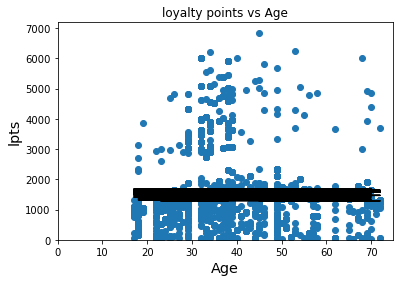

In [63]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)
plt.xlabel("Age", size = 'x-large')
plt.ylabel("lpts", size = 'x-large')
plt.title("loyalty points vs Age", size = 'large')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the chart as png
plt.savefig("Chart5 - Loyalty points vs Age.png")

# View the plot.
plt.show()

## Check for homoscedasticity

In [64]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 13.045150861307642, 'LM Test p-value': 0.00030407066519251314, 'F-stat': 13.11766668084642, 'F-test p-value': 0.0002998192355800465}


There is no correlation between the varaibility of the loyalty point and the variability in the age hence there is no need for the homoscedasticity determination, but this nonetheless shows presence of heterogeneity as LM p value is less than 0.05.

### 5d) Using Multiple linear regression

In [65]:
# View the dataset
rc

Llpts  lpts  gender  age  income  score  product education  \
0      7.714246   210    Male   18   12.30     39      453  graduate   
1      9.033423   524    Male   23   12.30     81      466  graduate   
2      5.321928    40  Female   22   13.12      6      254  graduate   
3      9.134426   562  Female   25   13.12     77      263  graduate   
4      8.515700   366  Female   33   13.94     40      291  graduate   
...         ...   ...     ...  ...     ...    ...      ...       ...   
1995  11.976922  4031  Female   37   84.46     69      977       PhD   
1996   9.074141   539  Female   43   92.66      8      979       PhD   
1997  12.454813  5614    Male   34   92.66     91     1012  graduate   
1998  10.033423  1048    Male   34   98.40     16     1031       PhD   
1999   8.903882   479    Male   32   92.66      8      453       PhD   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [66]:
# Independent variables: score, income and age 
# Pass linear regression through OLS methods.
# Dependent varaible : Loyalty points
loyalty = ols('y ~ score+income+age', data = rc).fit()

# Print the regression table.
loyalty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:04:35   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2203.0598     52.361    -42.075      0.000   -2305.747   -2100.372
score         34.1832      0.452     75.638      0.000      33.297      35.070
income        34.0084      0.497     68.427      0.000      33.034      34.983
age           11.0607      0.869     12.730      0.000       9.357      12.765
==============================================================================
Omnibus:                       22.644   Durbin-Watson:                   3.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.110
Skew:                           0.227   Prob(JB):                     5.82e-06
Kurtosis:                       3.290   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The correlation of 84% indicates that proportion of the variation in the loyalty points can be explained by the variation in the independent variables: spending score, income and age. 

Where other varaibles are the same the change in 1 unit in score would change the loyalty points bt 34.2. Similarly provided score and age are the same the change in 1 unit of income would lead to a change of 34 in loyalty points. The same applies to the 1 unit change in the age, the loyalty points with vary by 11 points provided other variables are the static.

In [67]:
# You can extract the predicted values.
# print("Predicted values: ", loyalty2.predict())  

# Residuals are calcualted
residuals = loyalty.predict() - y  

In [68]:
residuals

0       -462.520086
1        714.477463
2      -1348.436063
3        589.752871
4       -362.653257
           ...     
1995    -593.826576
1996    1158.231146
1997   -1179.109467
1998    1018.358923
1999    1096.563900
Name: lpts, Length: 2000, dtype: float64

Text(0.5, 0, 'age')

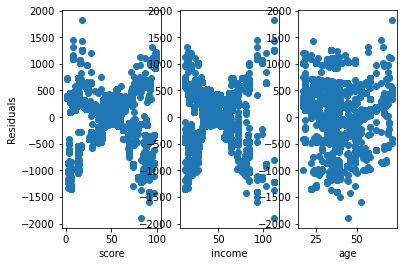

In [69]:
# Plot the residuals=(y-predict - y-observe) versus the x-variables.
# Ideally, there should be no pattern in this plot
plt.subplot(1,3,1)
plt.scatter(rc["score"], residuals)
plt.xlabel("score")
plt.ylabel("Residuals")
plt.subplot(1,3,2)
plt.scatter(rc["income"], residuals)
plt.xlabel("income")
plt.subplot(1,3,3)
plt.scatter(rc["age"], residuals)
plt.xlabel("age")



Residuals randomly scattered are advantageous

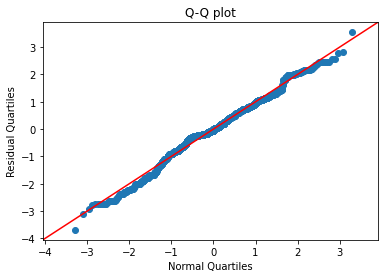

In [70]:
# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")

# Save the chart as png
plt.savefig("Residuals of Multiple Linear Regression")

plt.show()

In [71]:
# Now split the data to train the model and test the performance of the model accuracy

In [72]:
# Define the dependent variable.
y = rc['lpts']  

# Define the 3 independent variables.
X = rc[['score', 'income', 'age']] 

In [73]:
## Train and test the subsets with MLR multiple linear regression

In [74]:
# Split the data in 'train' (70%) and 'test' (30%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.30,
                                                                            random_state = 42)

In [75]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:                   lpts   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2513.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:04:36   Log-Likelihood:                -10711.
No. Observations:                1400   AIC:                         2.143e+04
Df Residuals:                    1396   BIC:                         2.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2185.5298     61.684    -35.431      0.0

R square is 84.4%, adjusted r square is has slightly reduces due to the increase in the parameters but not significantly 84.3%. The t is high and the p is very small forall three varables:score, income and age, therefore these are highly statistically significant. However, the variation is the loyalty points due to variation in product purchase is independent and is statistically insignificant.

The stats indicate that for every 1 unit change in the score, income and age the loyalty points change by 33.7, 34.5 and 10.7 repectively.

In [76]:
# Regression test

In [77]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [78]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [-220.33746102 3547.04684722 2994.54777478 ... 1778.6061872  1394.66891385
 1443.50341373]


In [79]:
# Test the model
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [-4.27284331e+02  2.99170289e+03  2.59962694e+03  1.23130714e+03
  1.53303118e+03  1.78403197e+03  4.37649713e+02  1.37458806e+03
  1.36569564e+03  3.25384266e+03  1.28286928e+03  1.65844214e+03
  1.69708508e+03  2.34848804e+03  1.28992238e+03  1.46361995e+03
  1.70069241e+03  8.17211089e+02 -2.97764878e+01 -9.54815963e+02
  1.55056071e+03  4.88232884e+01  1.66586780e+03  1.29866549e+03
  1.41254757e+03  1.42832034e+03  3.87712853e+03  1.62195451e+03
  1.65586381e+03  1.83732493e+03  8.88713685e+01  6.86808611e+02
  1.02052107e+03  1.71745950e+03  1.66391479e+03  1.28300128e+03
  8.92192347e+02  2.09089435e+03  1.36387719e+03  1.07522166e+03
  1.04063761e+03  1.57025781e+03  1.40204514e+03  4.22898364e+03
  4.28031391e+03 -3.51174192e+02  1.71745950e+03  1.53303118e+03
  1.82970201e+03  1.76407699e+03  1.38169672e+03  8.42518969e+02
  8.89238894e+02 -5.00566893e+02  1.94639942e+03  1.49039103e+03
  3.88862088e+02  4.07737649e+03  1.56472603e+03  3.15912968e+03


In [80]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100) 

83.00534613807653


The test dataset, r square value is 83%, failry close to the train data set.

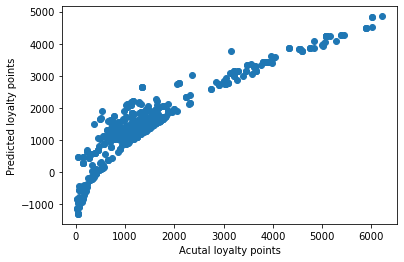

In [81]:
# View train vs test 
plt.scatter(Y_test, y_pred_mlr)
plt.xlabel('Acutal loyalty points')
plt.ylabel('Predicted loyalty points')

# Save the chart as png
plt.savefig("Chart6 b - Actual Loyalty points vs Predicted Loyalty ploints")

plt.show()

The above graph shows that the model appears to be a good fit for loyalty points prediction over 500 to 6000.  However the predictive values below 1000 will be unreliable.

## Check for multicollinearity, 
i.e. relationship between the independent variables, high multicollinearity leads to unrealiably coefficient estimates.
Imprecise estimaes lead to larger standard errors


In [82]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  

# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  


   VIF Factor features
0       20.52    const
1        1.06    score
2        1.00   income
3        1.06      age


The VIF of all three variables: score, income and age are very close to 1 so we can safely say that multicollinearity does not exist.

Variance inflation factor, VIF, is looking at the extent to which the variances of the parameter estimates are inflated due to correlations between the independent variables.   VIF range is from 1 to infinity.  Since VIF is 1 for both score and income therefore there is no multicollinearity.  

In [83]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [84]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 32.07984528506527, 'LM Test p-value': 5.034558891746587e-07, 'F-stat': 10.91278704233133, 'F-test p-value': 4.3690776756388403e-07}


The LMTest p-value is less that 0.05, so this indicates presence of heteroscedisticity. 

In [85]:
# Evaluate the model

# Impor the meterics
import sklearn.metrics as metrics

# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 398.0269061972348
Mean Square Error (Final): 275278.8844648307


MAE - The mean absolute error is the average, i.e. the mean, of the absolute differences.  So the closer the MAE, mean absolute error, is to zero the better. The MLR model although shows good correlation and is statistically significant with no multicollinearity, it needs to be taken into account the MAE is fairly large. 

## 6. Observations and insights

***Your observations here...***






The linear regression model and multiple linear regression models show that:

1. Loyalty points vs Spending Scores
45.2% of Variation in the loyalty points can be explained by the spend.  This was statistically significant.  Howerver, there was a presence of heteroscedasticity which did improve the R square coefficient but heteroscedasticity remained. The log of loyalty point improved the the r square, thus correlation but the heteroscedaticity remained.
    
2. Loyalty Points vs Income
38% of the variation in the loyalty points can be explained by income.  This was statistically significant. However, there was presence of heteroscedasticity.  The log of loyalty point reduced the r square to 28% correlation but homodascisticity was gained. Indicating that we can deduce that 28% of the variation in the loyalty points can be attributed to the variation in income.

3. Loyalty points vs Age
There was no statistically significant relationship between age and loyalty points. 

4. Multiple Linear Regression
The model showed 83% correlation with a 70:30 split.  This is statistically significant with no multicollinearity
Hence, we can deduce with caution (due to large MAE) that the variation in the loyalty points can be explained by the combination of the variation in spending score, income and age as loyalty points show dependency on spending scores, income and age but not product. 


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [86]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [87]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv("turtle_reviews_clean_log.csv")

# View DataFrame.
df2

Llpts  lpts  gender  age  income  score  product education  \
0      7.714246   210    Male   18   12.30     39      453  graduate   
1      9.033423   524    Male   23   12.30     81      466  graduate   
2      5.321928    40  Female   22   13.12      6      254  graduate   
3      9.134426   562  Female   25   13.12     77      263  graduate   
4      8.515700   366  Female   33   13.94     40      291  graduate   
...         ...   ...     ...  ...     ...    ...      ...       ...   
1995  11.976922  4031  Female   37   84.46     69      977       PhD   
1996   9.074141   539  Female   43   92.66      8      979       PhD   
1997  12.454813  5614    Male   34   92.66     91     1012  graduate   
1998  10.033423  1048    Male   34   98.40     16     1031       PhD   
1999   8.903882   479    Male   32   92.66      8      453       PhD   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [88]:
# Drop unnecessary columns.
df2_cls = df2.drop(columns=['Llpts', 'review', 'summary'])

print(df2_cls)


# rearrange the columns
df2_cls = df2_cls[list(('lpts', 'age', 'income', 'score', 'product', 'gender','education'))]

# View DataFrame.
df2_cls

      lpts  gender  age  income  score  product education
0      210    Male   18   12.30     39      453  graduate
1      524    Male   23   12.30     81      466  graduate
2       40  Female   22   13.12      6      254  graduate
3      562  Female   25   13.12     77      263  graduate
4      366  Female   33   13.94     40      291  graduate
...    ...     ...  ...     ...    ...      ...       ...
1995  4031  Female   37   84.46     69      977       PhD
1996   539  Female   43   92.66      8      979       PhD
1997  5614    Male   34   92.66     91     1012  graduate
1998  1048    Male   34   98.40     16     1031       PhD
1999   479    Male   32   92.66      8      453       PhD

[2000 rows x 7 columns]


lpts  age  income  score  product  gender education
0      210   18   12.30     39      453    Male  graduate
1      524   23   12.30     81      466    Male  graduate
2       40   22   13.12      6      254  Female  graduate
3      562   25   13.12     77      263  Female  graduate
4      366   33   13.94     40      291  Female  graduate
...    ...  ...     ...    ...      ...     ...       ...
1995  4031   37   84.46     69      977  Female       PhD
1996   539   43   92.66      8      979  Female       PhD
1997  5614   34   92.66     91     1012    Male  graduate
1998  1048   34   98.40     16     1031    Male       PhD
1999   479   32   92.66      8      453    Male       PhD

[2000 rows x 7 columns]

In [89]:
# Explore the data.
df2_cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lpts       2000 non-null   int64  
 1   age        2000 non-null   int64  
 2   income     2000 non-null   float64
 3   score      2000 non-null   int64  
 4   product    2000 non-null   int64  
 5   gender     2000 non-null   object 
 6   education  2000 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


In [90]:
# Descriptive statistics.
df2_cls.describe()

lpts          age       income        score       product
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000
mean   1578.032000    39.495000    48.079060    50.000000   4320.521500
std    1283.239705    13.573212    23.123984    26.094702   3148.938839
min      25.000000    17.000000    12.300000     1.000000    107.000000
25%     772.000000    29.000000    30.340000    32.000000   1589.250000
50%    1276.000000    38.000000    47.150000    50.000000   3624.000000
75%    1751.250000    49.000000    63.960000    73.000000   6654.000000
max    6847.000000    72.000000   112.340000    99.000000  11086.000000

## 2. Plot

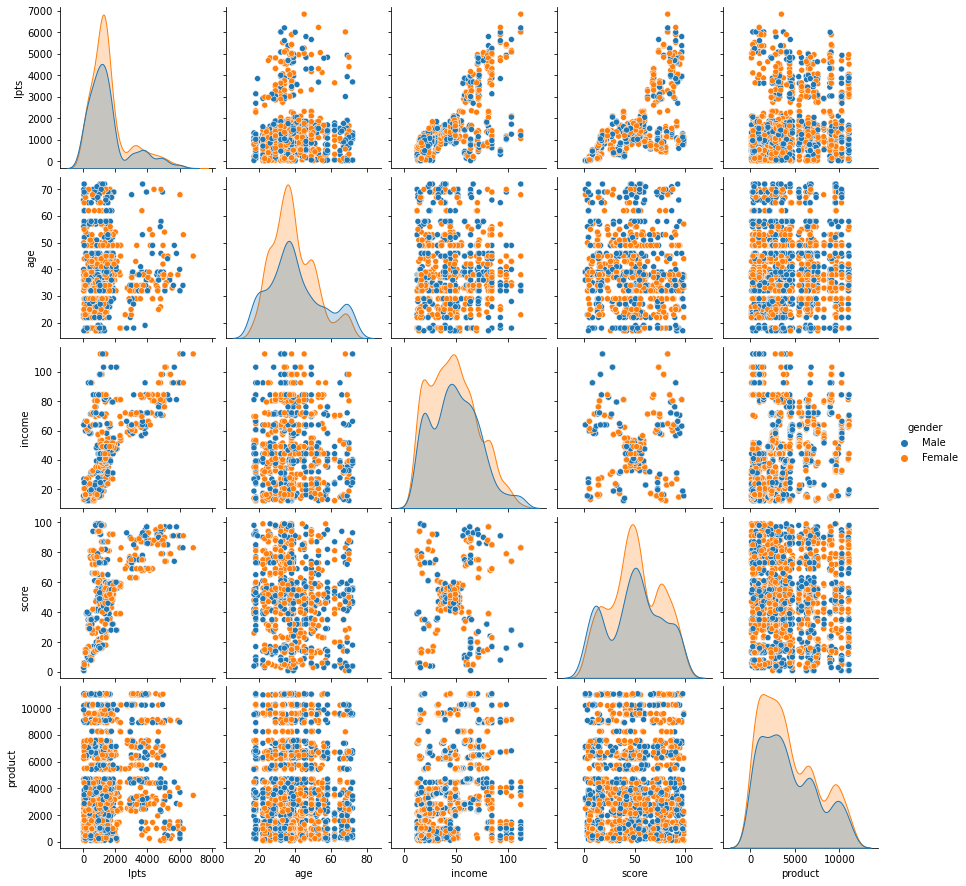

In [91]:
# Plot using seaborn
# The intention is to build a clustering solution that can identify patterns based on the available features.
# The data is labelled and we will compare the results obtained with the known (Truth) values.
sns.pairplot(df2_cls, vars=['lpts', 'age', 'income', 'score', 'product'], hue="gender", diag_kind= 'kde')

In [92]:
# Article code
# Standardize the data to have a mean of zero and a standard deviation of one
# Why do we scale data?
# What is the impact of scaling? 
# df2_cls.iloc[:,:5] = StandardScaler().fit_transform(df2_cls.iloc[:,:5])

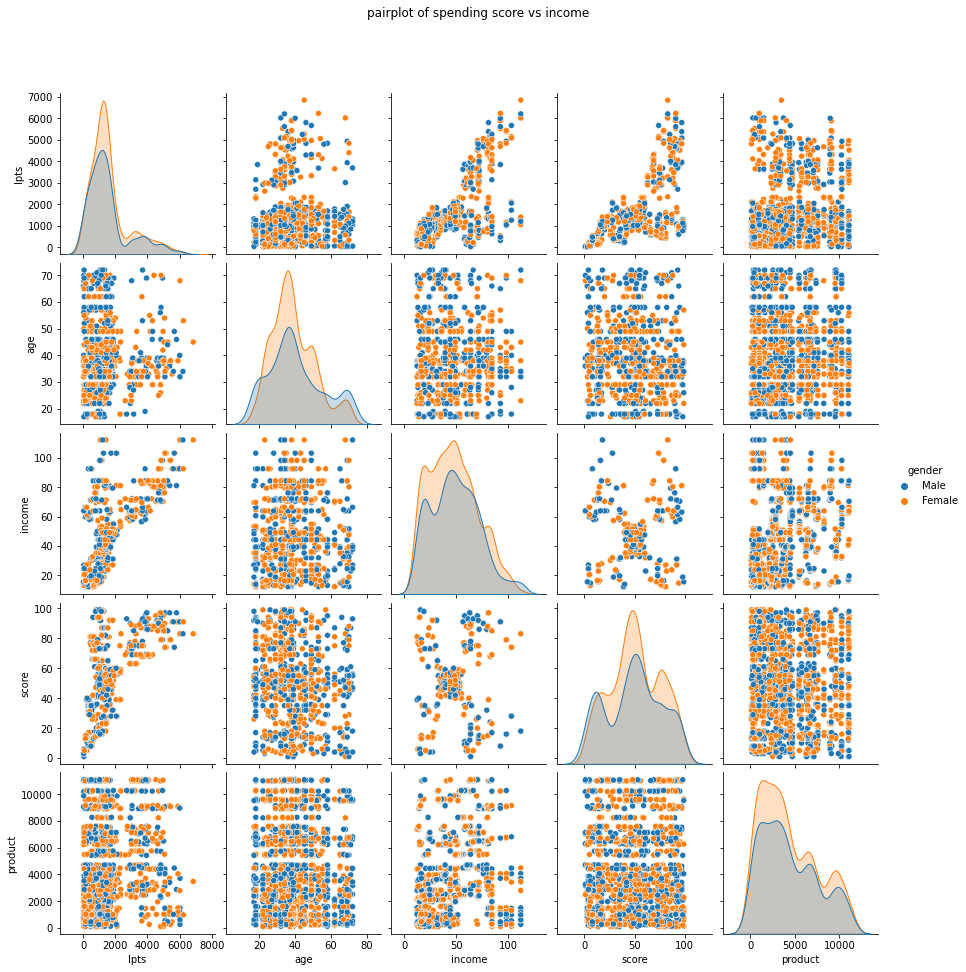

<Figure size 432x288 with 0 Axes>

In [93]:
# Article code
# Exploratory Data Analysis

# This is the view we typically have
g = sns.pairplot(df2_cls, hue='gender', diag_kind= 'kde')
g.fig.suptitle('pairplot of spending score vs income', y=1.08)
plt.show()

#save as chart as png
plt.savefig("Chart7, Pairplot of Spending Score vs income.png", box_inches = 'tight');

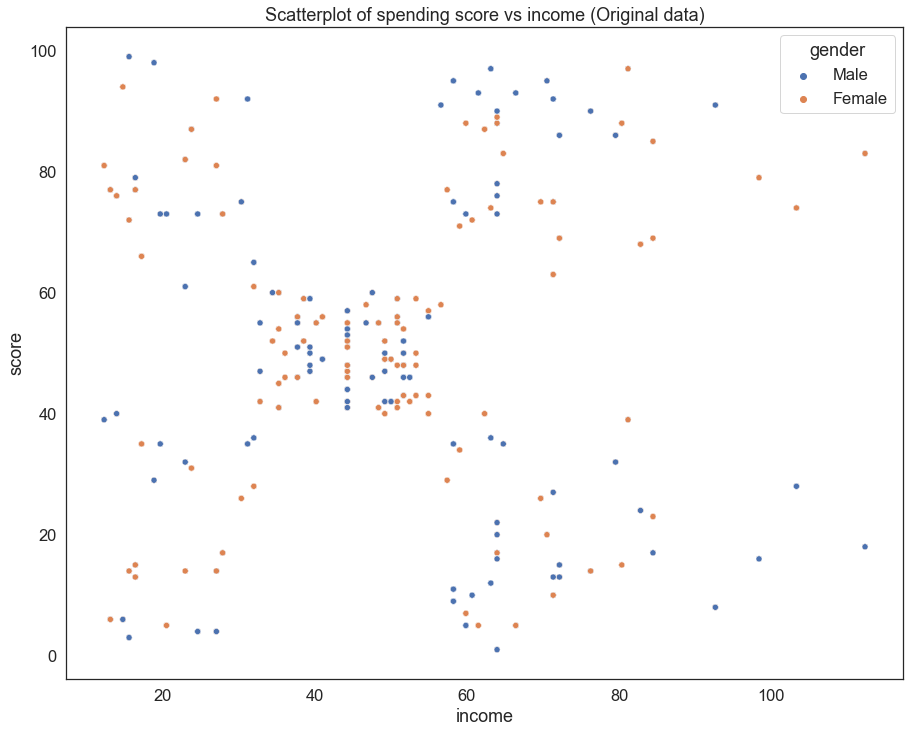

In [94]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Change the font size
sns.set(font_scale =1.5)

# Set the plot style as white.
sns.set_style('white')

# Create a scatterplot with Seaborn.
sns.scatterplot(x='income',
                y='score',
                data=df2_cls,
                hue='gender').set(title = 'Scatterplot of spending score vs income (Original data)')

#save as chart as png
plt.savefig("Chart8 - Scatterplot score vs income(original).png", box_inches = 'tight');

## 3. Elbow and silhoutte methods

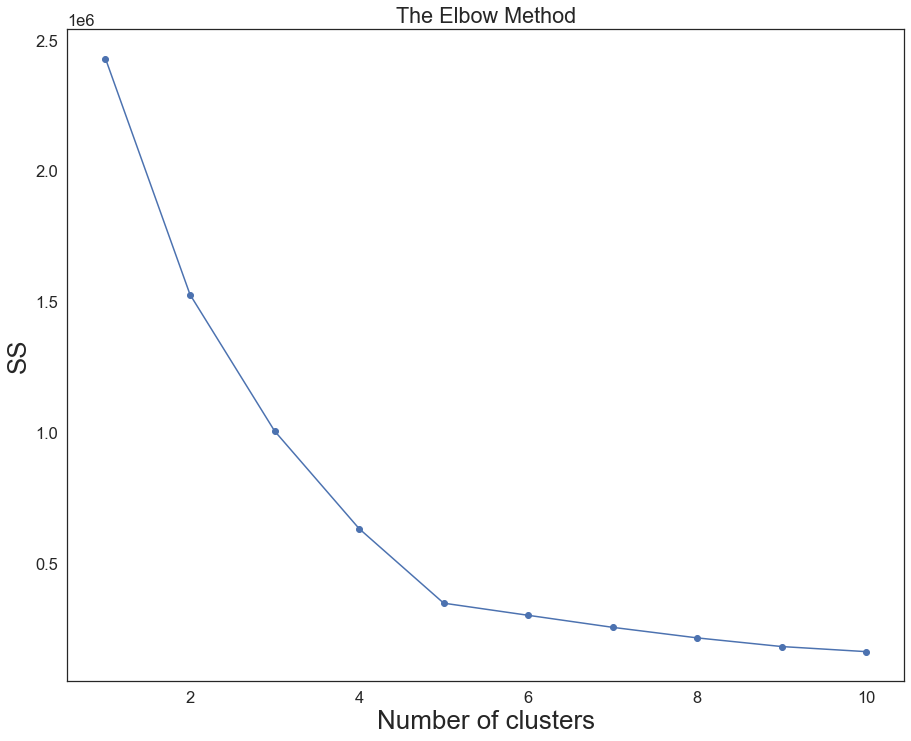

In [95]:
# Determine the number of clusters: Elbow method.

# Import the KMeans class.
from sklearn.cluster import KMeans 

x = df2_cls[['income', 'score']]

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method", size = 'large')
plt.xlabel("Number of clusters", size = 'x-large')
plt.ylabel("SS", size = 'x-large')

# Save the chart as png
plt.savefig("Chart9 - Elbow Method.png")

plt.show()

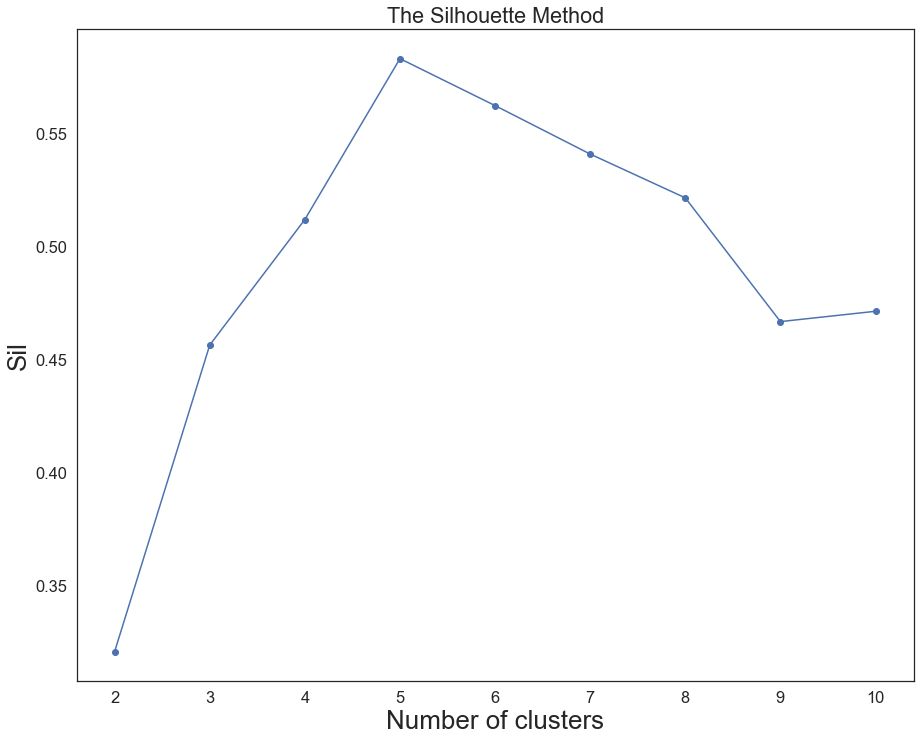

In [96]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method", size = 'large')
plt.xlabel("Number of clusters", size = 'x-large')
plt.ylabel("Sil", size = 'x-large')

# Save the chart as png
plt.savefig("Chart10 - Silhouette Method.png")

plt.show()

## 4. Evaluate k-means model at different values of *k*

The two charts are showing k value to be 5 clearly

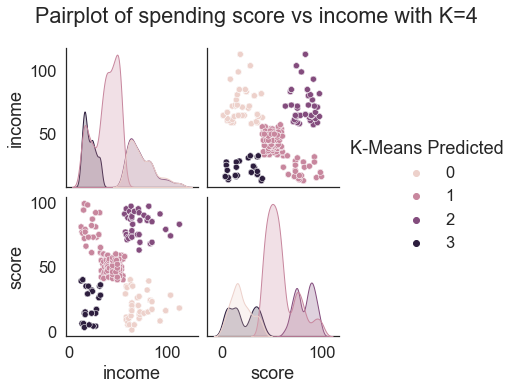

In [97]:
# However we will evaluate K = 4 just to explore the evaluation

# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
g = sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
g.fig.suptitle('Pairplot of spending score vs income with K=4', y=1.08)


#save as chart as png
plt.savefig("Chart11, Pairplot of Spending Score vs income (K=4).png", box_inches = 'tight');

 The above chart clearly indicates that the cluster = 1, has a very wide spreasd and can befurther divided thus increaseing the K to 5 may yeild a better outcome
    

In [98]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

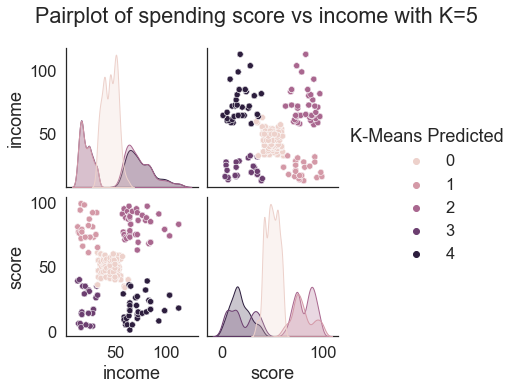

In [99]:
# As specified above the elbow and silhouette methods both pointed to K = 5, and the evaluation of K =4 indicated that K=4
# was not appropriate.  Thus settling with K=5 for this model.

# Set the plot style as white.
sns.set_style('white')

# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
g = sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
g.fig.suptitle('Pairplot of spending score vs income with K=5', y=1.08)

#save as chart as png
plt.savefig("Chart12, Pairplot of Spending Score vs income (K=5).png", box_inches = 'tight');

In [100]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [101]:
# View the K-Means predicted.
print(x.head())

   income  score  K-Means Predicted
0   12.30     39                  3
1   12.30     81                  1
2   13.12      6                  3
3   13.12     77                  1
4   13.94     40                  3


## 6. Plot and interpret the clusters

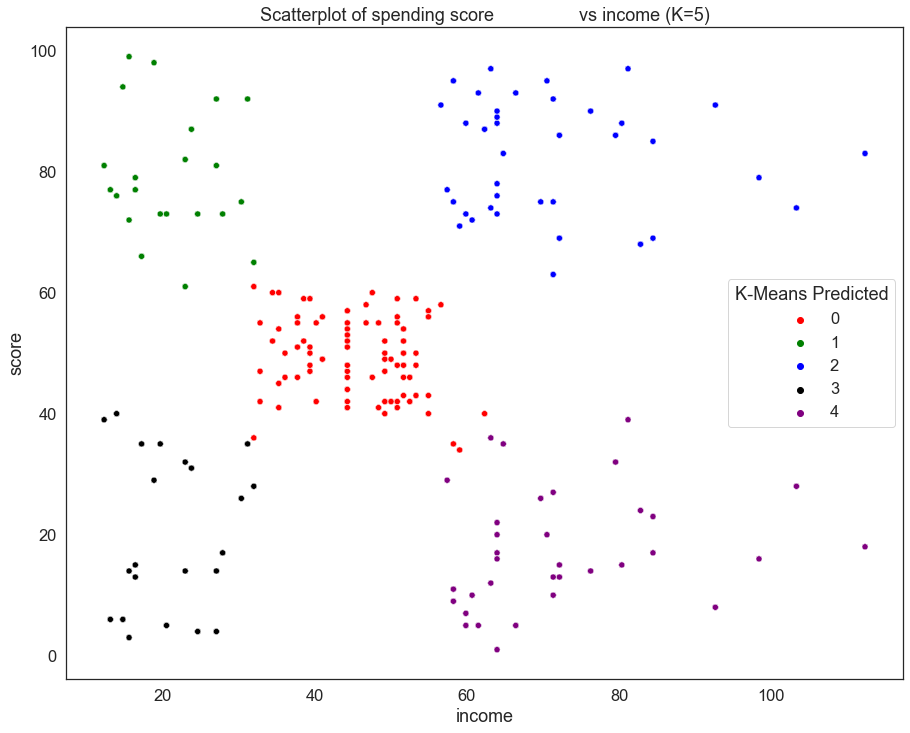

In [102]:
# Visualising the clusters.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Change the font size
sns.set(font_scale =1.5)

# Set the plot style as white.
sns.set_style('white')

# Create a scatterplot.
sns.scatterplot(x='income' , 
                y ='score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'purple']).set(title = 'Scatterplot of spending score \
                vs income (K=5)')

#save as chart as png
plt.savefig("Chart13 - Scatterplot score vs income(k=5).png", box_inches = 'tight');

In [103]:
# View the DataFrame.
x.head()

income  score  K-Means Predicted
0   12.30     39                  3
1   12.30     81                  1
2   13.12      6                  3
3   13.12     77                  1
4   13.94     40                  3

In [104]:
# Determing the mean and range per each cluster group
clusters = x.groupby('K-Means Predicted')['score', 'income'].aggregate(['mean', 'min', 'max']).round(0)

# View the dataframe
print(clusters)

                  score         income             
                   mean min max   mean   min    max
K-Means Predicted                                  
0                  50.0  34  61   44.0  32.0   62.0
1                  79.0  61  99   20.0  12.0   32.0
2                  82.0  63  97   73.0  57.0  112.0
3                  20.0   3  40   20.0  12.0   32.0
4                  17.0   1  39   75.0  57.0  112.0


 ## 7. Discuss: Insights and observations

***The elbow method and silouhette method very clearly showed the K=5, showing five distinctive cluster groups.


Cluster 3  --- Low earners scores 20, (3 - 40), Low Spending Scores 20, (12 - 32)

Clusters 1 --- Low earners 20, (12 - 32), High Spending  79, (61 - 99) 

Cluster 0 ---  Middle earners  50, (34 - 61), average spending scores 44, (32 -62)

Cluster 4 ---  High earners 75, (57 - 112), Low Spending Scores 17, (1 - 39)

Cluster 2 ---   High earners 73, (57 - 112), High Spening Scores 82 (63 - 97) 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [105]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Load the data set as df3.
df3 = pd.read_csv("turtle_reviews_clean_log.csv")

# View DataFrame.
df3

Llpts  lpts  gender  age  income  score  product education  \
0      7.714246   210    Male   18   12.30     39      453  graduate   
1      9.033423   524    Male   23   12.30     81      466  graduate   
2      5.321928    40  Female   22   13.12      6      254  graduate   
3      9.134426   562  Female   25   13.12     77      263  graduate   
4      8.515700   366  Female   33   13.94     40      291  graduate   
...         ...   ...     ...  ...     ...    ...      ...       ...   
1995  11.976922  4031  Female   37   84.46     69      977       PhD   
1996   9.074141   539  Female   43   92.66      8      979       PhD   
1997  12.454813  5614    Male   34   92.66     91     1012  graduate   
1998  10.033423  1048    Male   34   98.40     16     1031       PhD   
1999   8.903882   479    Male   32   92.66      8      453       PhD   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [107]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Llpts      2000 non-null   float64
 1   lpts       2000 non-null   int64  
 2   gender     2000 non-null   object 
 3   age        2000 non-null   int64  
 4   income     2000 non-null   float64
 5   score      2000 non-null   int64  
 6   product    2000 non-null   int64  
 7   education  2000 non-null   object 
 8   review     2000 non-null   object 
 9   summary    2000 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 156.4+ KB


In [108]:
# Keep necessary columns. Drop unnecessary columns, retain the review and summary columns.
df3_s = df3.drop(columns=['Llpts', 'lpts', 'gender', 'age', 'income', 'score', 'product','education'])

# View DataFrame.
print(df3_s)

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4

In [109]:
# Determine if there are any missing values.
df3_s.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [110]:
# Review: Change all to lower case and join with a space.
df3_s['review'] = df3_s['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_s['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [111]:
# Summary: Change all to lower case and join with a space.
df3_s['summary'] = df3_s['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_s['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [112]:
# Replace all the punctuations in review column.
df3_s['review'] = df3_s['review'].str.replace('[^\w\s]','')

# View output.
df3_s['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [113]:
# Replace all the puncuations in summary column.
df3_s['summary'] = df3_s['summary'].str.replace('[^\w\s]','')

# View output.
df3_s['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [114]:
# Check the number of duplicate values in the review column.
df3_s.review.duplicated().sum()

50

In [115]:
# Check the number of duplicate values in the summary column.
df3_s.summary.duplicated().sum()

649

In [116]:
df3_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [117]:
# Drop duplicates in both columns.
review = df3_s.drop_duplicates(subset=['review', 'summary'])

In [118]:
# View DataFrame.
review.reset_index(inplace=True)
review.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [119]:
# View the shape of the data.
review.shape

(1961, 3)

## 3. Tokenise and create wordclouds

In [120]:
# Create new DataFrame (copy DataFrame).
rt = review

# View DataFrame.
rt

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 3 columns]

In [121]:
# Apply tokenisation to both columns.
rt['review_1'] = rt['review'].apply(word_tokenize)
rt['summary_1'] = rt['summary'].apply(word_tokenize)

# View DataFrame.
rt.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                            review_1  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                           summary_1  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [122]:
# Create wordcloud

In [123]:
# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
review_comments = ''
for i in range(rt.shape[0]):
    # Add each comment.
    review_comments = review_comments + rt['review'][i]


In [124]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_comments) 

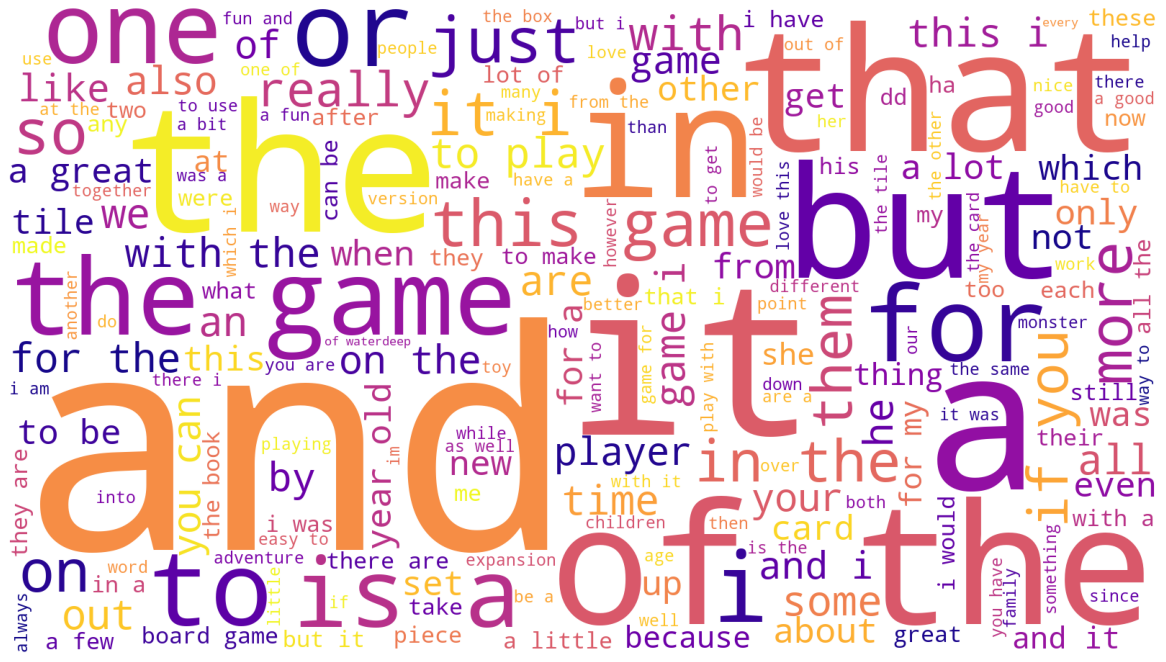

In [125]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

#save as chart as png
plt.savefig("Chart14 - Review:worldcloud with stop words.png", box_inches = 'tight');

plt.show()

In [126]:
# Summary: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
summary_comments = ''
for i in range(rt.shape[0]):
    # Add each comment.
   summary_comments = summary_comments + rt['summary'][i]

In [127]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_comments) 

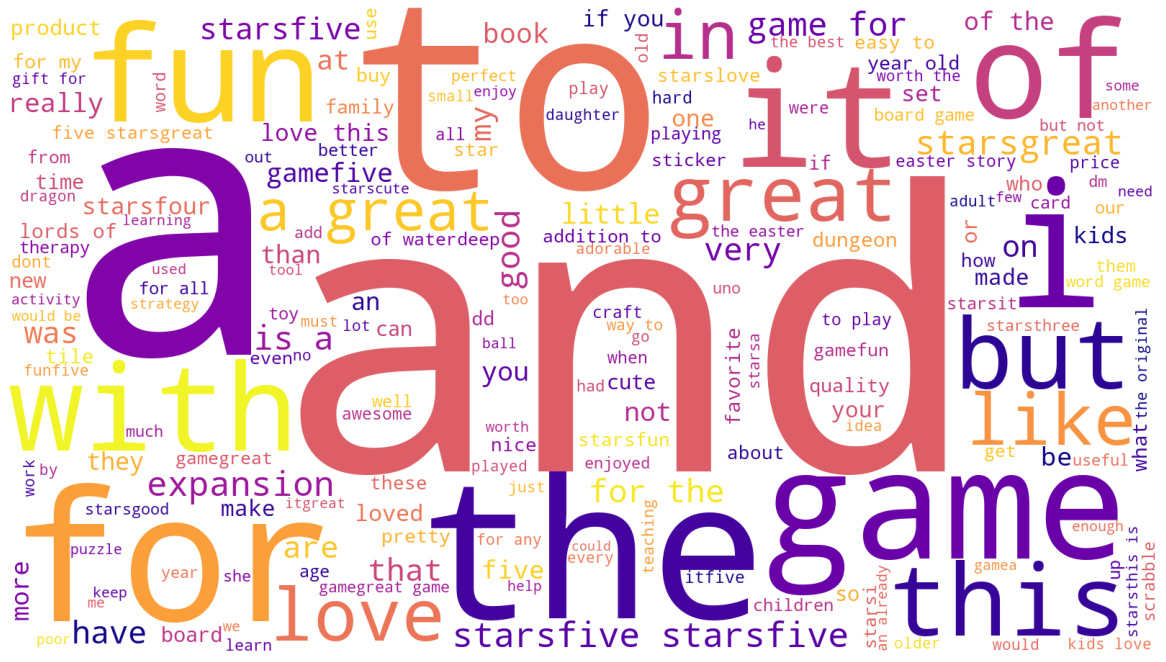

In [128]:
# Summary: Plot the WordCloud image.
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

#save as chart as png
plt.savefig("Chart15 - Summary:worldcloud with stop words.png", box_inches = 'tight');

plt.show()

## 4. Frequency distribution and polarity


In [129]:
# Apply tokenisation to both columns.
rt['review_1'] = rt['review'].apply(word_tokenize)
rt['summary_1'] = rt['summary'].apply(word_tokenize)

# preview the tokenised words
print(rt['review_1'].head())
print (rt['summary_1'].head())

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_1, dtype: object
0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_1, dtype: object


In [130]:
### 4a) Create frequency distribution

#  Review Column

In [131]:
# Define an empty list of tokens.
review_tokens = []

for i in range(rt.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + rt['review_1'][i]

In [132]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(review_tokens)

# Preview data.
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

#  Summary Column

In [133]:
# Define an empty list of tokens.
summary_tokens = []

for i in range(rt.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + rt['summary_1'][i]

In [134]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(summary_tokens)

# Preview data.
fdist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [135]:
# Review Column

In [136]:
# Delete all the alpanum.
tokens_r = [word for word in review_tokens if word.isalnum()]

In [137]:
# Remove all the stopwords

In [138]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_r2 = [x for x in tokens_r if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_r2_string = ''

for value in tokens_r:
    # Add each filtered token word to the string.
    tokens_r2_string = tokens_r2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
# Summary Column

In [140]:
# Delete all the alpanum.
tokens_s = [word for word in summary_tokens if word.isalnum()]

In [141]:
# Remove all the stopwords

In [142]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_s2 = [x for x in tokens_s if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_s2_string = ''

for value in tokens_s:
    # Add each filtered token word to the string.
    tokens_s2_string = tokens_s2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [143]:
# Review Column

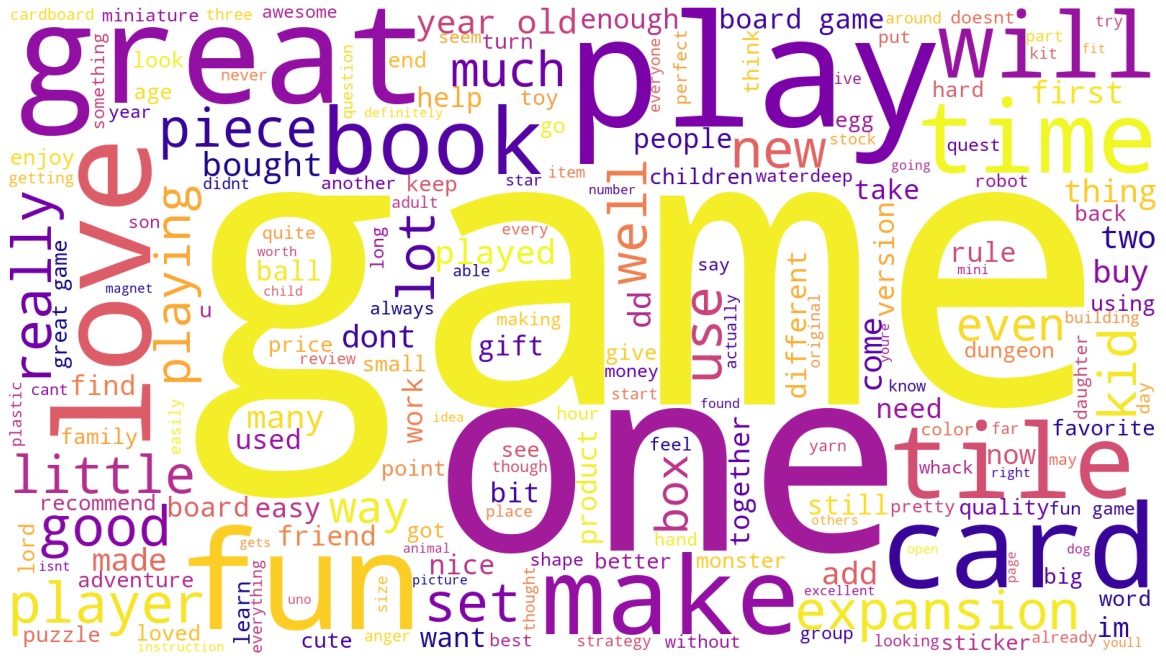

In [144]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_r2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

#save as chart as png
plt.savefig("Chart16 - Review:worldcloud without stop words.png", box_inches = 'tight');

plt.show()


In [145]:
# Summary Column

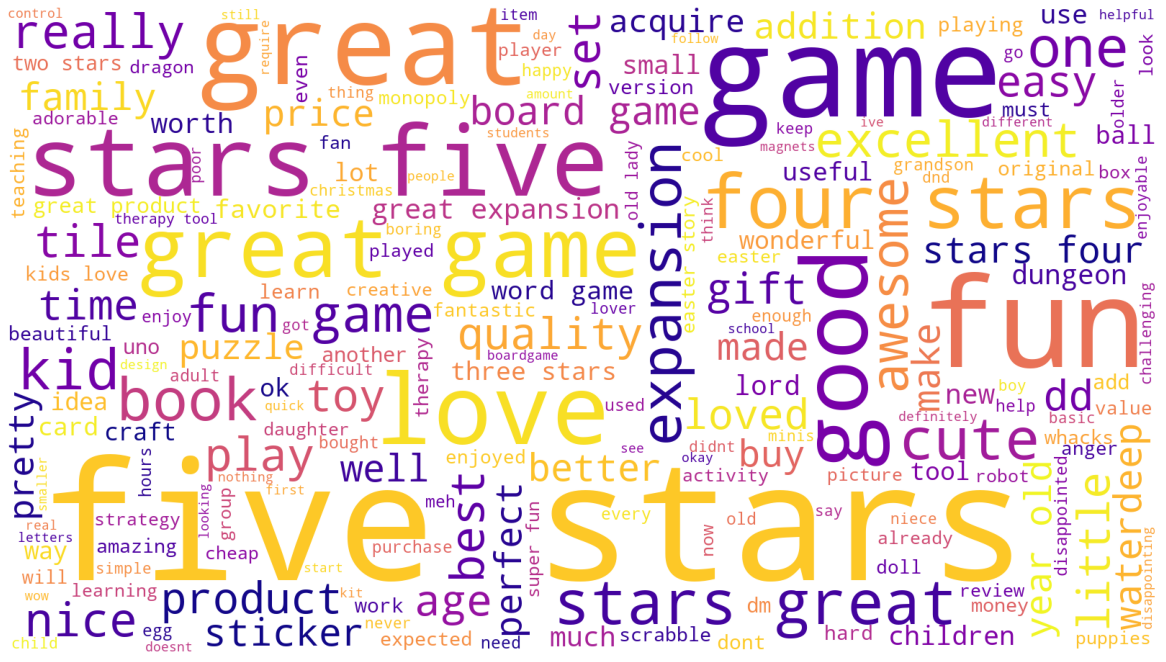

In [146]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_s2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

#save as chart as png
plt.savefig("Chart17 - Summary:worldcloud without stop words.png", box_inches = 'tight');

plt.show()

### 4d) Identify 15 most common words and polarity

# Review Column

In [147]:
# View the frequency distribution.
fdist1 = FreqDist(tokens_r2)

# Preview the data.
fdist1

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [148]:
# Determine the 15 most common words.

In [149]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens_r2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

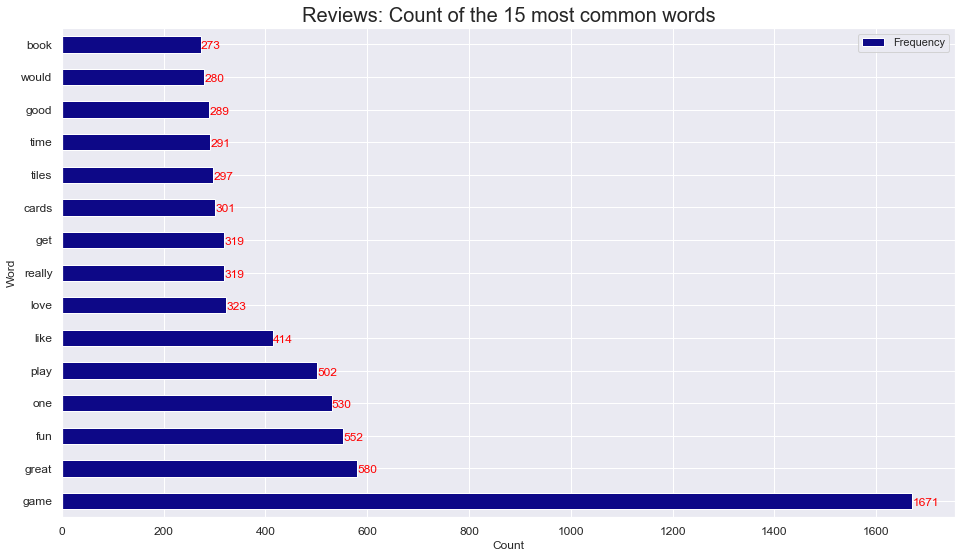

In [150]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Reviews: Count of the 15 most common words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
#save as chart as png
plt.savefig("Chart18 - Reviews:Count of the 15 most common words.png", box_inches = 'tight');

In [151]:
# Summary Column

In [152]:
# View the frequency distribution.
fdist1 = FreqDist(tokens_s2)

# Preview the data.
fdist1

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [153]:
# Determine the 15 most common words.

In [154]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens_s2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

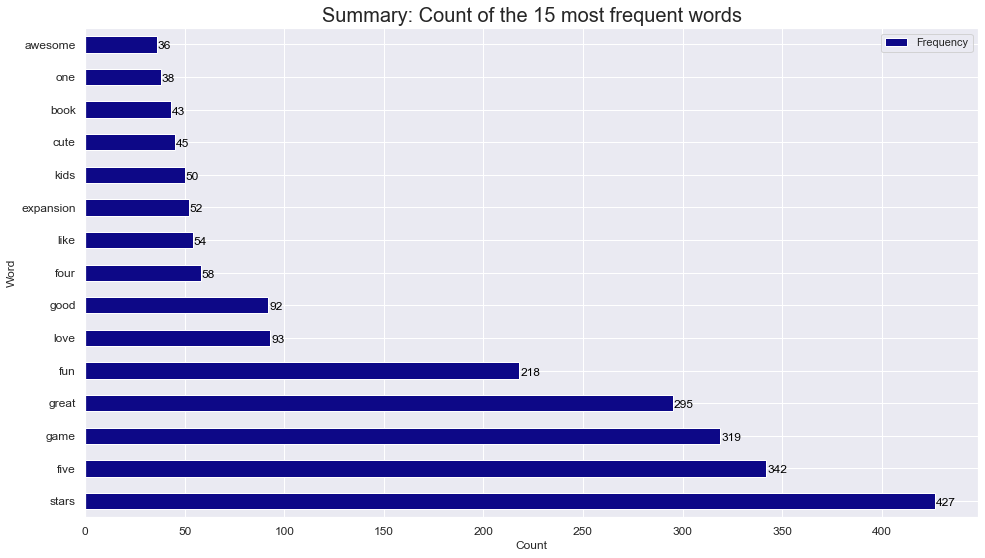

In [155]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')
    
#save as chart as png
plt.savefig("Chart19 - Summary:Count of the 15 most common words.png", box_inches = 'tight');

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [156]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [157]:
# Determine polarity of both columns. 

In [158]:
# Polarity and subjectivity of Review column

In [159]:
# Populate a new column with polarity scores for each comment.
rt['polarity_r'] = rt['review'].apply(generate_polarity)

# View output.
rt['polarity_r'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_r, dtype: float64

In [160]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
rt['subjectivity_r'] = rt['review'].apply(generate_subjectivity)

# Preview the result.
rt['subjectivity_r'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_r, dtype: float64

In [161]:
# Polarity and subjectivity of Summary column

In [162]:
# Populate a new column with polarity scores for each comment.
rt['polarity_s'] = rt['summary'].apply(generate_polarity)

# View output.
rt['polarity_s'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_s, dtype: float64

In [163]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
rt['subjectivity_s'] = rt['summary'].apply(generate_subjectivity)

# Preview the result.
rt['subjectivity_s'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_s, dtype: float64

In [164]:
# Visualise sentiment polarity and Subjectivity of Review Column

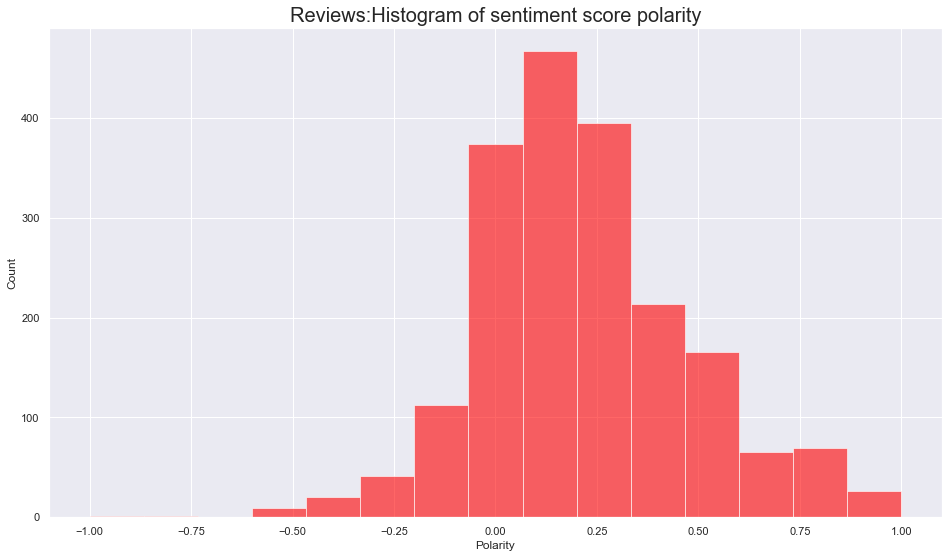

In [165]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(rt['polarity_r'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Reviews:Histogram of sentiment score polarity', fontsize=20)

#save as chart as png
plt.savefig("Chart20 - Reviews:Histomgram of polarity.png", box_inches = 'tight');

plt.show()

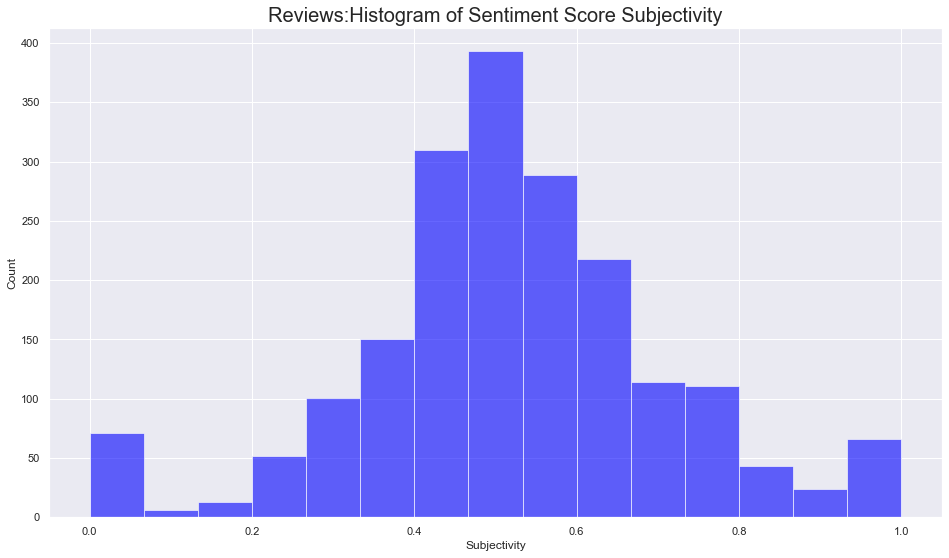

In [166]:
# Histogram of subjectivity score

# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(rt['subjectivity_r'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Reviews:Histogram of Sentiment Score Subjectivity', fontsize=20)

#save as chart as png
plt.savefig("Chart21 - Reviews:Histomgram of Subjectivity.png", box_inches = 'tight');

plt.show()

In [167]:
# Visualise sentiment polarity and Subjectivity of Summary Column

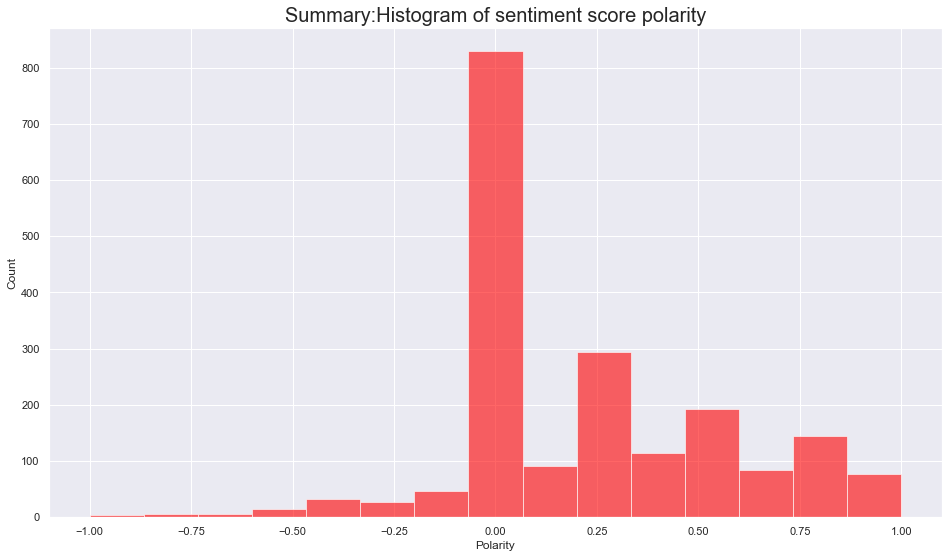

In [168]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(rt['polarity_s'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary:Histogram of sentiment score polarity', fontsize=20)

#save as chart as png
plt.savefig("Chart22 - Summary:Histomgram of Polarity.png", box_inches = 'tight');

plt.show()

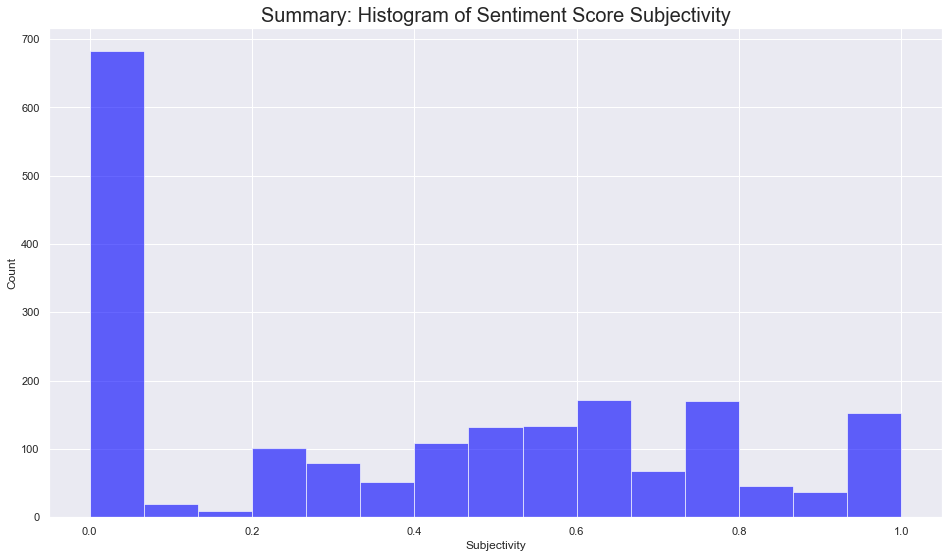

In [169]:
# Histogram of subjectivity score

# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(rt['subjectivity_s'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Histogram of Sentiment Score Subjectivity', fontsize=20)

#save as chart as png
plt.savefig("Chart23 - Summary:Histomgram of Subjectivity.png", box_inches = 'tight');

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [170]:
# Top 20 negative reviews.

# Create a Dataframe
negative_sentiment_r = rt.nsmallest(20, 'polarity_r')

# Eliminate unnecessary columns.
negative_sentiment_r = negative_sentiment_r[['review', 'polarity_r', 'subjectivity_r']]

# Save as csv file
negative_sentiment_r.to_csv('negative_sentiment_review.csv')

# View output.
negative_sentiment_r

review  polarity_r  \
207   booo unles you are patient know how to measure...   -1.000000   
181                   incomplete kit very disappointing   -0.780000   
1773  im sorry i just find this product to be boring...   -0.583333   
362   one of my staff will be using this game soon s...   -0.550000   
116   i bought this as a christmas gift for my grand...   -0.500000   
226   this was a gift for my daughter i found it dif...   -0.500000   
229                    i found the directions difficult   -0.500000   
289              instructions are complicated to follow   -0.500000   
300                                           difficult   -0.500000   
1501                         expensive for what you get   -0.500000   
173   i sent this product to my granddaughter the po...   -0.491667   
345   my 8 yearold granddaughter and i were very fru...   -0.446250   
531   i purchased this on the recommendation of two ...   -0.440741   
305                 very hard complicated to make these   -0.439583   
421                     kids i work with like this game   -0.400000   
430   this game although it appears to be like uno a...   -0.400000   
490   my son loves playing this game it was recommen...   -0.400000   
795                                this game is a blast   -0.400000   
798         i bought this for my son he loves this game   -0.400000   
814             was a gift for my son he loves the game   -0.400000   

      subjectivity_r  
207         1.000000  
181         0.910000  
1773        0.750000  
362         0.300000  
116         0.900000  
226         1.000000  
229         1.000000  
289         1.000000  
300         1.000000  
1501        0.700000  
173         0.433333  
345         0.533750  
531         0.485185  
305         0.852083  
421         0.400000  
430         0.400000  
490         0.400000  
795         0.400000  
798         0.400000  
814         0.400000

In [171]:
# Top 20 negative summaries.

# Create a Dataframe
negative_sentiment_s = rt.nsmallest(20, 'polarity_s')

# Eliminate unnecessary columns.
negative_sentiment_s = negative_sentiment_s[['summary', 'polarity_s', 'subjectivity_s']]

# View output.
negative_sentiment_s

# Save as csv file
negative_sentiment_s.to_csv('negative_sentiment_summary.csv')

In [172]:
# Top 20 positive reviews.

# Create a Dataframe
positive_sentiment_r = rt.nlargest(20, 'polarity_r')

# Eliminate unnecessary columns.
positive_sentiment_r = positive_sentiment_r[['review', 'polarity_r', 'subjectivity_r']]

# View output.
positive_sentiment_r

# Save as csv file
positive_sentiment_r.to_csv('positive_sentiment_review.csv')

In [173]:
# Top 20 positive summaries.

# Create a Dataframe
positive_sentiment_s = rt.nlargest(20, 'polarity_s')

# Eliminate unnecessary columns.
positive_sentiment_s = positive_sentiment_s[['summary', 'polarity_s', 'subjectivity_s']]

# View output.
positive_sentiment_s

# Save as csv file
positive_sentiment_s.to_csv('positive_sentiment_summary.csv')

In [174]:
negative_sentiment_r.at[795, 'review']

'this game is a blast'

## 7. Discuss: Insights and observations

***Your observations here...***

1. After removing the stop words the top 20 common words for the 
review coloum: FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})
Summary column: FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

2. All the above 20 words tend to convey positive sentiments
3. For the reviews the sensitivity polarity score shows a high frequency at 0-0.25 which is in the neutral sentiment region
4. The subjectivity for the review has a high frequency between 0.4-0.6 indicating that this is in the middle of being objective and subjective based sentiment. Both polarity and subjectivity curve were closer to normal distribution.
5.For the summary the sentiment polarity was indicating a strong neutral sentiment.
6.The subjectivity score indicates that there is a significantly high frequency at 0 i.e. the sentiment is purely fact based, objective. However there was a positive skew to teh curve.
7. The difference seen in polarity scores seen between the review and summary may be due to the fact that summarising a review tends to either select or eliminate strong emotive words which can tilt the polarity to either end of the scale
8. The difference in the subjectivity scores seen in the review and summary is also due to the same reason as above.  Presenting the review in a more concise way taking out some subjective elements.
9.  For the reasons described above in point 7 & 8 , the review data is more representative of customer's true sentiment as it is an uncondensed version of customer's true feelings. 
10. The histogram of the polarity of the review shows it to be more positive.  Even a negative comment at index 795 with a polarity of -0.4, 'this game is a blast' is more positive than neutral with the subjectivity scores of 0.4-0.6 suggesting that these were balanced reviews i.e neither completely fact based or highly opinionated.  
11 The top 20 negative comments in the review shows that only the top 16 are actually complaints as these are all about the product. Summary comments are somewhat limited.
12. The top 20 positive comments are to do with the product quality/condition and delivery. Summary comments do not provide a real insight.
13 All positive reviews apart from 3 were highly subjective. Was arounf condition, a couple about the functionality of the activity
14 All positive summary apart from 3 were highly subjective.
Mainly one words, good functionality. An anomaly
16. Main complaints included in the reviews were – boring, difficult, complicated games and toys 
17. Main complaints included in teh summary were -  dissapointed, boring, promotes anger instead of calm, difficult, worthless dungeon dragon masters screen from galeforce9.

# 